# Project Write a Data Science Blog Post
## (Seattle AirBNB Data)

This is the project of Udacity's data scientist nanodegree program.
In this project, we are required to analysis data with ***CRISP-DM process***. The CRISP-DM process is below.

### CRISP-DM (Cross-Industry Standard Process for Data Mining)
* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

## Business Understanding:
Airbnb is a community-based online platform for listing and renting local homes. It connects hosts and travelers and facilitates the process of renting without owning any rooms itself. Moreover it cultivates a sharing-economy by allowing property owners to rent out private flats.
[source](https://bmtoolbox.net/stories/airbnb/)

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Some Questions that i will try to answer in this dataset:
- What are the busiest times of the year to visit Seattle?
- Is there a busy season?
- Do some neighborhood have more listings than other? and dose it effect reviews?and what is average price per night?

## Data Understanding:
We have three datasets.

- listings: including full descriptions and average review score.
- calendar: including listing id and the price and availability for that day.
- reviews: including unique id for each reviewer and detailed comments.

In this part, I'll make some visualization and aggregation to understand the charactoristics of the data.

In [1]:
# import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load Datasets
seattle_listing = pd.read_csv('listings.csv')
seattle_calendar = pd.read_csv('calendar.csv')
seattle_review = pd.read_csv('reviews.csv')

### listings:

In [3]:
# look at data Header
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# see list of all coloumns and sata typs
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

since there is 91 coloumns i will not go through all of them but will focus on some

In [5]:
print("Num of listings: ", seattle_listing.id.count())
print("Num of rows: ", seattle_listing.shape[0])

Num of listings:  3818
Num of rows:  3818


Next, I am interested in below columns.

- review_scores_rating
- price
- neighbourhood

What is the distribution of these values in each columns? Is the distribution skewed or normal?
Let's look at!

In [6]:
# review_scores_rating
seattle_listing['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


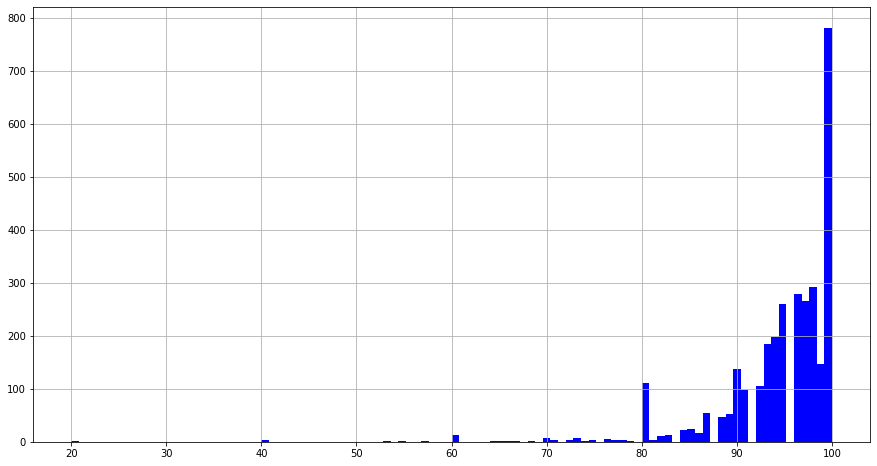

In [7]:
# cleaning data
listings_q1_df = seattle_listing['review_scores_rating'].dropna()

# plot histgram
plt.figure(figsize=(15, 8))
plt.hist(listings_q1_df.values, bins=100, color='b')
plt.grid()

This is very right skewed distribution.
the most common thing is 100 points.
I can say the low score listings are minority.

In [8]:
# price
# cleaning data
listings_q2_df = seattle_listing.copy(deep=True)
listings_q2_df = listings_q2_df['price'].dropna().reset_index()
listings_q2_df['price'] = listings_q2_df['price'].map(lambda x: float(x[1:].replace(',', '')))

listings_q2_df['price'].describe().reset_index()

,index,price
0,count,3818.000000
1,mean,127.976166
2,std,90.250022
3,min,20.000000
4,25%,75.000000
5,50%,100.000000
6,75%,150.000000
7,max,1000.000000


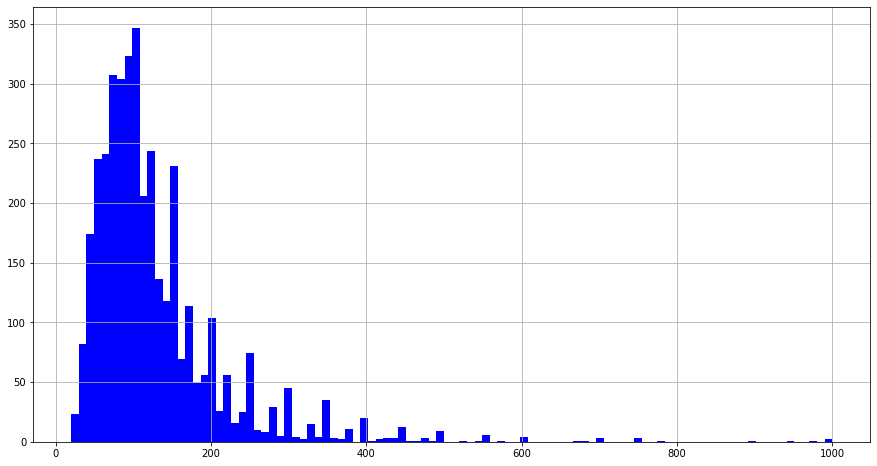

In [9]:
plt.figure(figsize=(15, 8))
plt.hist(listings_q2_df.price, bins=100, color='b')
plt.grid()

This is long tail distribution. the most common thing is between 75 to 200  points. I can say the hight price listings are minority

In [10]:
#neighbourhood

# lets see how many missing values we have in neighbourhood
print(seattle_listing.neighbourhood.isnull().sum())

416


In [11]:
# exploring value counts in this coloumn
print(seattle_listing['neighbourhood'].value_counts())

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Beacon Hill       2
Roxhill                 1
Fairmount Park          1
North College Park      1
Name: neighbourhood, Length: 81, dtype: int64


In [12]:
# exploring how many uniqu values we have
print(seattle_listing['neighbourhood'].value_counts().count())

81


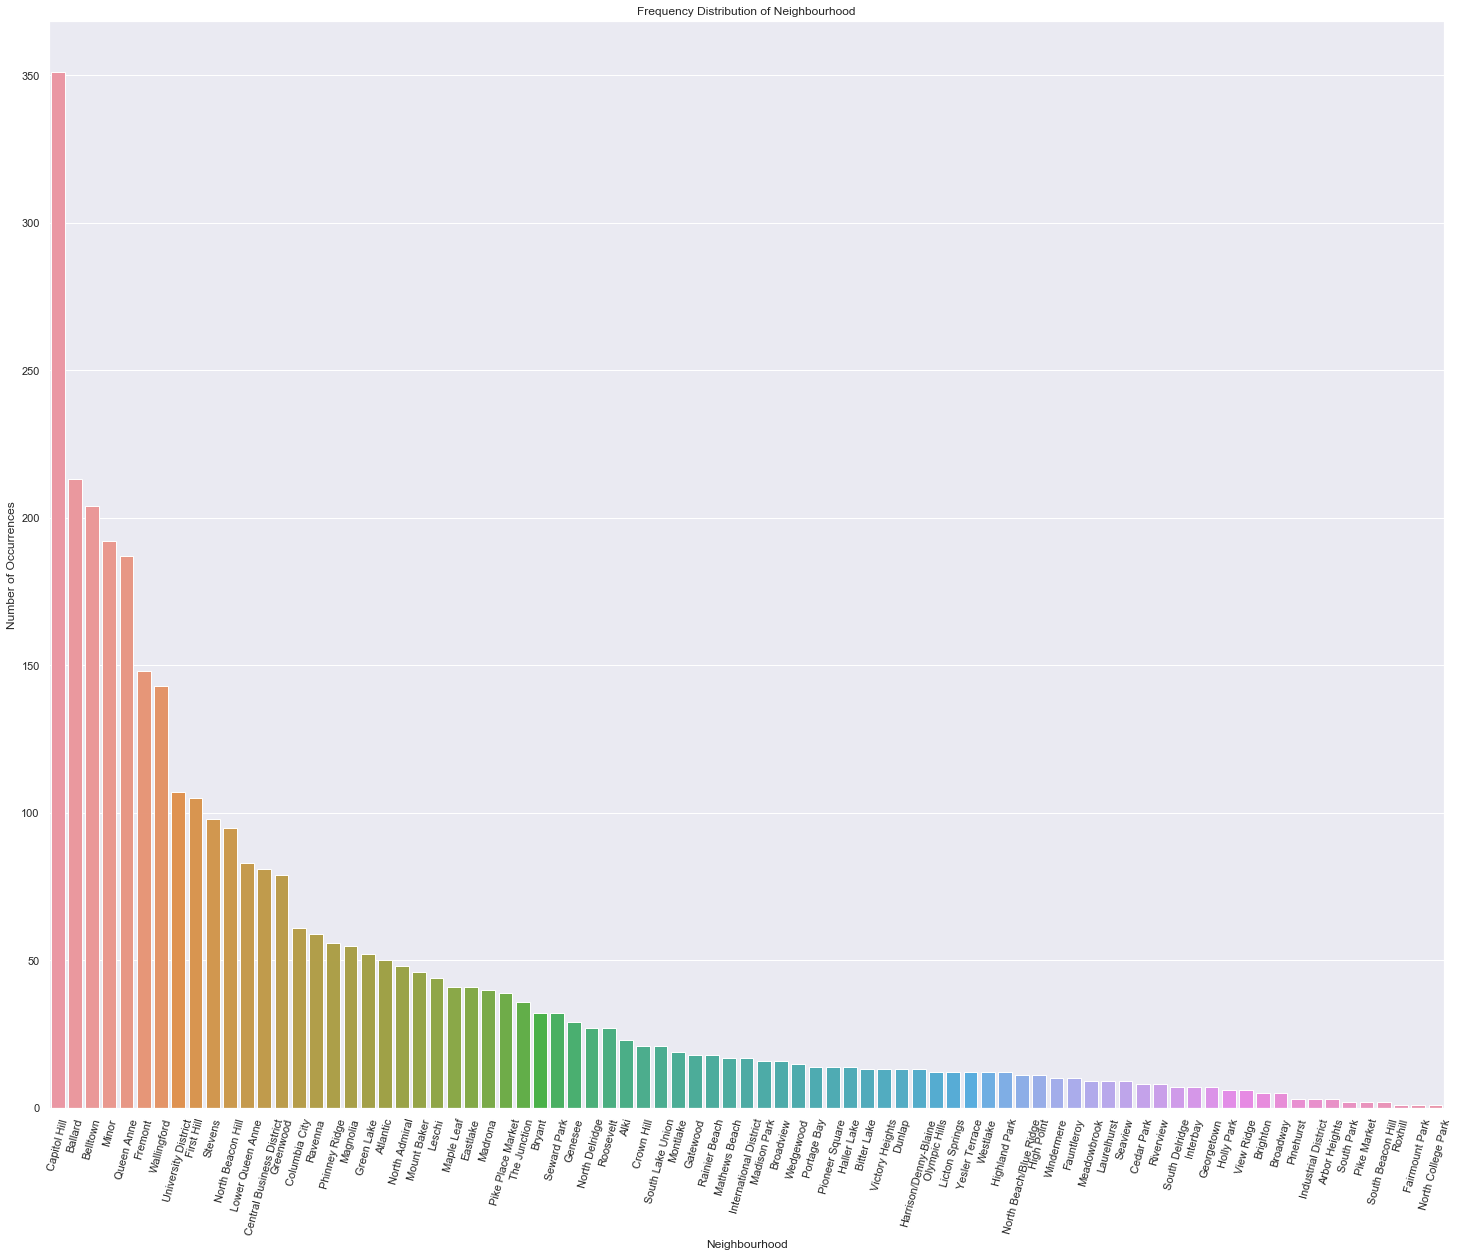

In [13]:
# plotting to shows the frequency distribution of the neighbourhood column
neighbourhood_count = seattle_listing['neighbourhood'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(25, 20))
a = sns.barplot(neighbourhood_count.index, neighbourhood_count.values, alpha=0.99)
a.set_xticklabels(a.get_xticklabels(), rotation=75)
plt.title('Frequency Distribution of Neighbourhood')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.show()

in this bar chart it is clear that there is some constration of listings in seattle.

### Summary
- The listings data has 92 columns.
- The review_scores_rating has right skewed distribution, and almost values are over 90 points.
- The price has long tail distribution, almost values are around 100 but some values are much higher than other values.
- The neighbourhood has very consentrated listings in few neighbourhoods more than others.

### calendar:

In [14]:
# look at header
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [15]:
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


- this data seems to be showing avilablitey to each listing in the dataset for the whole time period.
- it looks like there is a price when it is avilable and NaN when it is not.
- avilable coloumn looks like to have the value t when listing is avilable and f if not.

now lets verify,

In [16]:
#it looks like there is a price when it is avilable and NaN when it is not.
# avilable coloumn looks like to have the value t when listing is avilable and f if not.

calendar_q1_df = seattle_calendar.groupby('available')['price'].count().reset_index()
calendar_q1_df.columns = ['available', 'price_nonnull_count']
calendar_q1_df

,available,price_nonnull_count
0,f,0
1,t,934542


In [17]:
# this data seems to be showing avilablitey to each listing in the dataset for the whole time period (2008).  
# How many rows per each listing_id?
calendar_q2_df = seattle_calendar.groupby('listing_id')['date'].count().reset_index()
calendar_q2_df['date'].value_counts()

365    3818
Name: date, dtype: int64

Finally, I'll research is there any trend of the listings price.

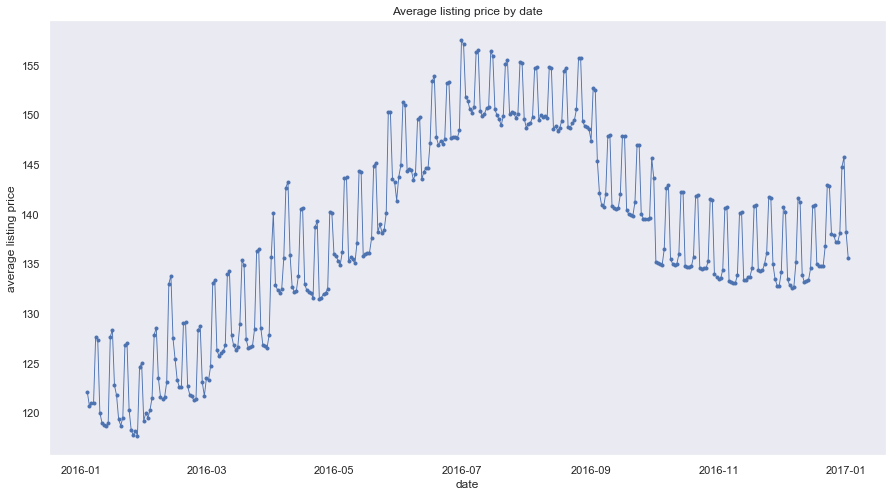

In [18]:
# process data
calendar_q3_df = seattle_calendar.copy(deep=True)
calendar_q3_df.dropna(inplace=True)
calendar_q3_df['date'] = pd.to_datetime(calendar_q3_df['date'])
calendar_q3_df['price'] = calendar_q3_df['price'].map(lambda x: float(x[1:].replace(",", "")))

# apply aggregation
calendar_q3_df = calendar_q3_df.groupby('date')['price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date, calendar_q3_df.price, color='b', marker='.', linewidth=0.9)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

There are two trend of the data.

- The average price rise from 2016/1 to 2016/7, and reach peak for three months, and getting lower. And the average proce of 2017/1 is higher than 1 years ago **which seems to be due a seasonel spike**.
- There is periodic small peak that i will explore more.

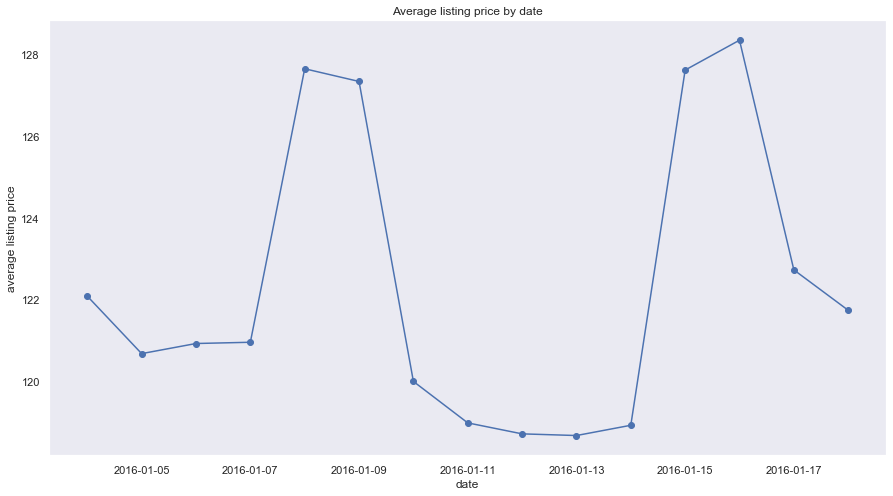

In [19]:
# plot more narrow range
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date.values[:15], calendar_q3_df.price.values[:15], color='b', marker='o', linewidth=1.5)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

It looks like a weekly trend as I thought.
Then, which does weekday have high price?

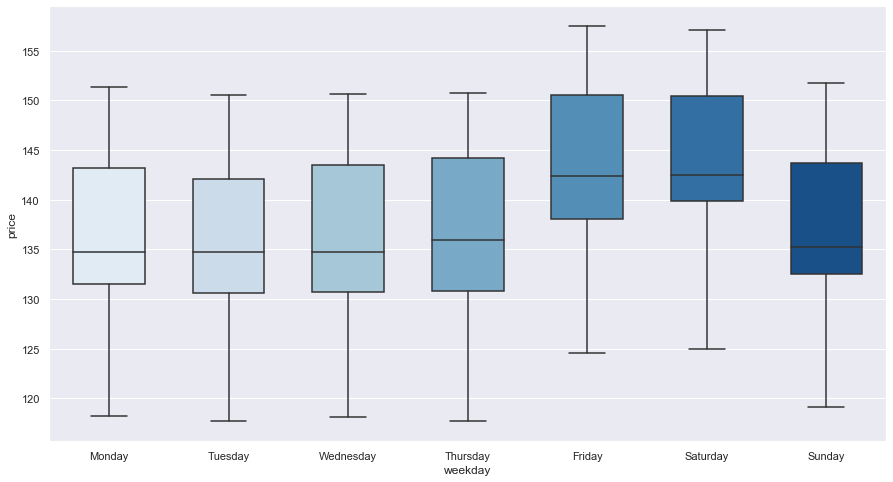

In [20]:
# create weekday column
calendar_q3_df["weekday"] = calendar_q3_df["date"].dt.day_name()

# boxplot to see price distribution
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'weekday',  y = 'price', data = calendar_q3_df, palette="Blues", width=0.6)
plt.show()

### Summary
- Each listings has 365 days record in this data.
- If available values are f, the price values are NaN.
- There is the weekly trend which the listing prices in weekend are higher than other weekday.

### reviews:

In [21]:
seattle_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [22]:
seattle_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


There are six columns, such as listing_id that received review, id of reviews, when review submitted, and so on.
I want to see the time series change of the number of comments.

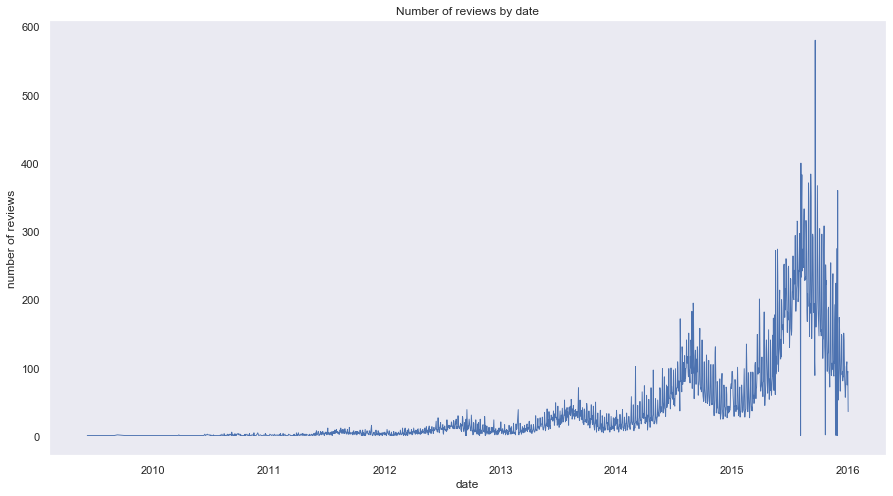

In [23]:
# convert date column's data type to date from object
review_q1_df = seattle_review.copy(deep=True)
review_q1_df.date = pd.to_datetime(review_q1_df.date)

review_q1_df = review_q1_df.groupby('date')['id'].count().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_q1_df.date, review_q1_df.id, color='b', linewidth=0.9)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

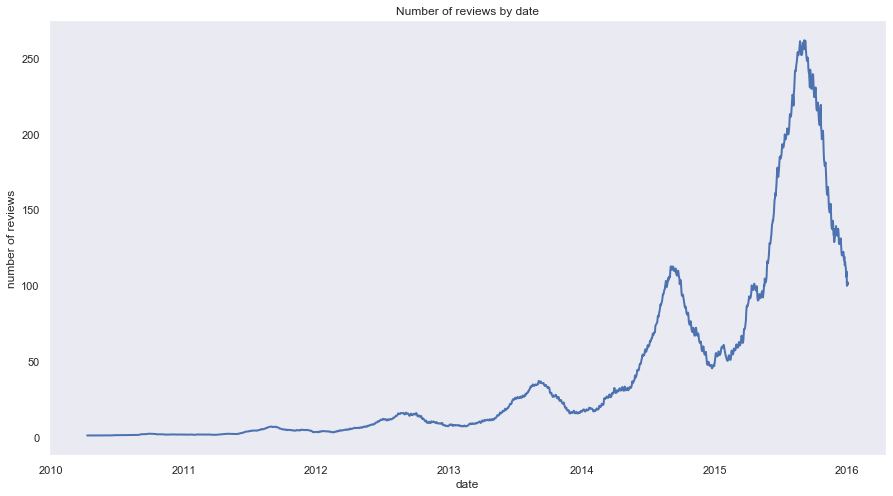

In [24]:
# create rolling mean column to try and smooth this graph
review_q1_df["rolling_mean_30"] = review_q1_df.id.rolling(window=30).mean()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_q1_df.date, review_q1_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

In [25]:
# I will extract when the peak comes in each year.

review_q1_df["year"] = review_q1_df.date.dt.year
years = review_q1_df.year.unique()

for year in years:
    if year >= 2010 and year < 2016:
        year_df = review_q1_df[review_q1_df.year == year]
        max_value = year_df.rolling_mean_30.max()
        max_date = year_df[year_df.rolling_mean_30 == max_value].date.dt.date.values[0]
        print(year, max_date, np.round(max_value, 1))

2010 2010-10-04 2.3
2011 2011-08-31 7.0
2012 2012-09-04 16.2
2013 2013-09-04 37.0
2014 2014-09-03 112.6
2015 2015-09-05 261.6


The peak seems to be towards the beginning of September **(summer vacation)**

### Answering first Question:
from the above we can answer the first Question **What are the busiest times of the year to visit Seattle?**
and rhat seems to be summer seaseon and specificley twoards September.

### Answering second Question:
**Is there a busy season?**

It can not be said exactly because the actual duration of the user's stay are not included in the data, but the number of reviews is considered to be a guide. In addition, since periodical peaks appear in the number of reviews annually, it may be considered that the neighborhood is a busy season.

We found that the biggest busy season was the beginning of September, but how long will it be the busy season? Let's look in more detail!

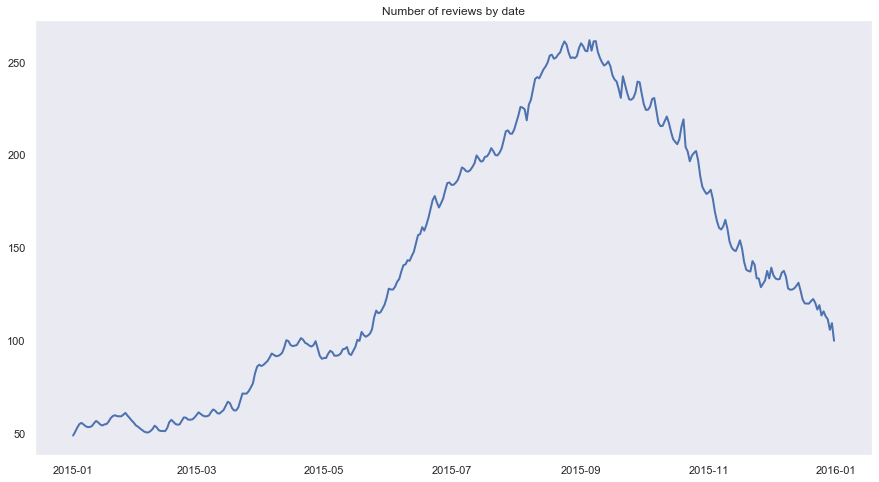

In [26]:
review_q2_df = review_q1_df[review_q1_df.year == 2015]

plt.figure(figsize=(15, 8))
plt.plot(review_q2_df.date, review_q2_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.grid()

from above graph i can say it is **from September till novemeber**

### Answerig third Question:
Do some neighborhood have more listings than other? and dose it effect reviews?and what is average price per night?
i'll answer this question using listing dataset

In [27]:
listing_q3_df = seattle_listing.copy(deep=True)
listing_q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [28]:
# dropping all irrelvent coloumns
listing_q3_df = listing_q3_df[['id','neighbourhood','price','review_scores_rating'] ]
listing_q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   neighbourhood         3402 non-null   object 
 2   price                 3818 non-null   object 
 3   review_scores_rating  3171 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 119.4+ KB


In [29]:
# Fixing Price Coloumn
listing_q3_df['price'] = listing_q3_df['price'].map(lambda x: float(x[1:].replace(",", "")))
listing_q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   neighbourhood         3402 non-null   object 
 2   price                 3818 non-null   float64
 3   review_scores_rating  3171 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 119.4+ KB


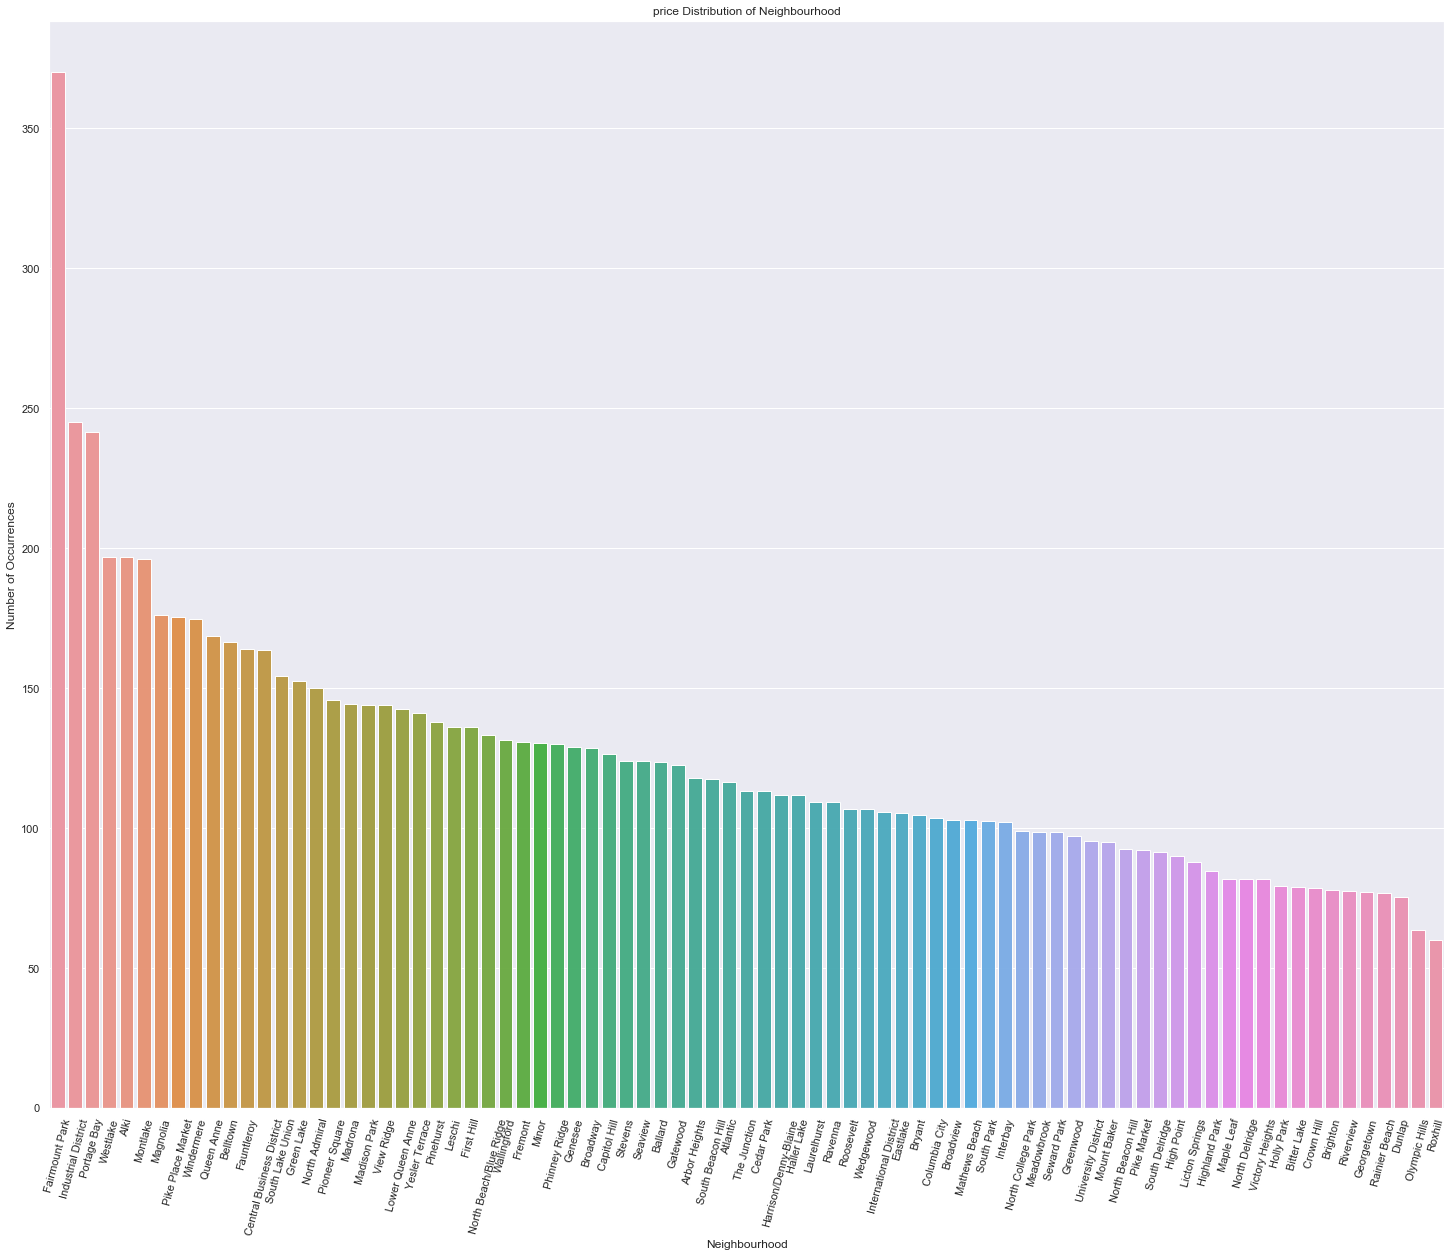

In [30]:
neighbourhood_price = listing_q3_df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)
sns.set(style="darkgrid")
plt.figure(figsize=(25, 20))
a = sns.barplot(neighbourhood_price.index, neighbourhood_price.values, alpha=0.99)
a.set_xticklabels(a.get_xticklabels(), rotation=75)
plt.title('price Distribution of Neighbourhood')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.show()

from what we see above price dose deffer between neighbourhoods

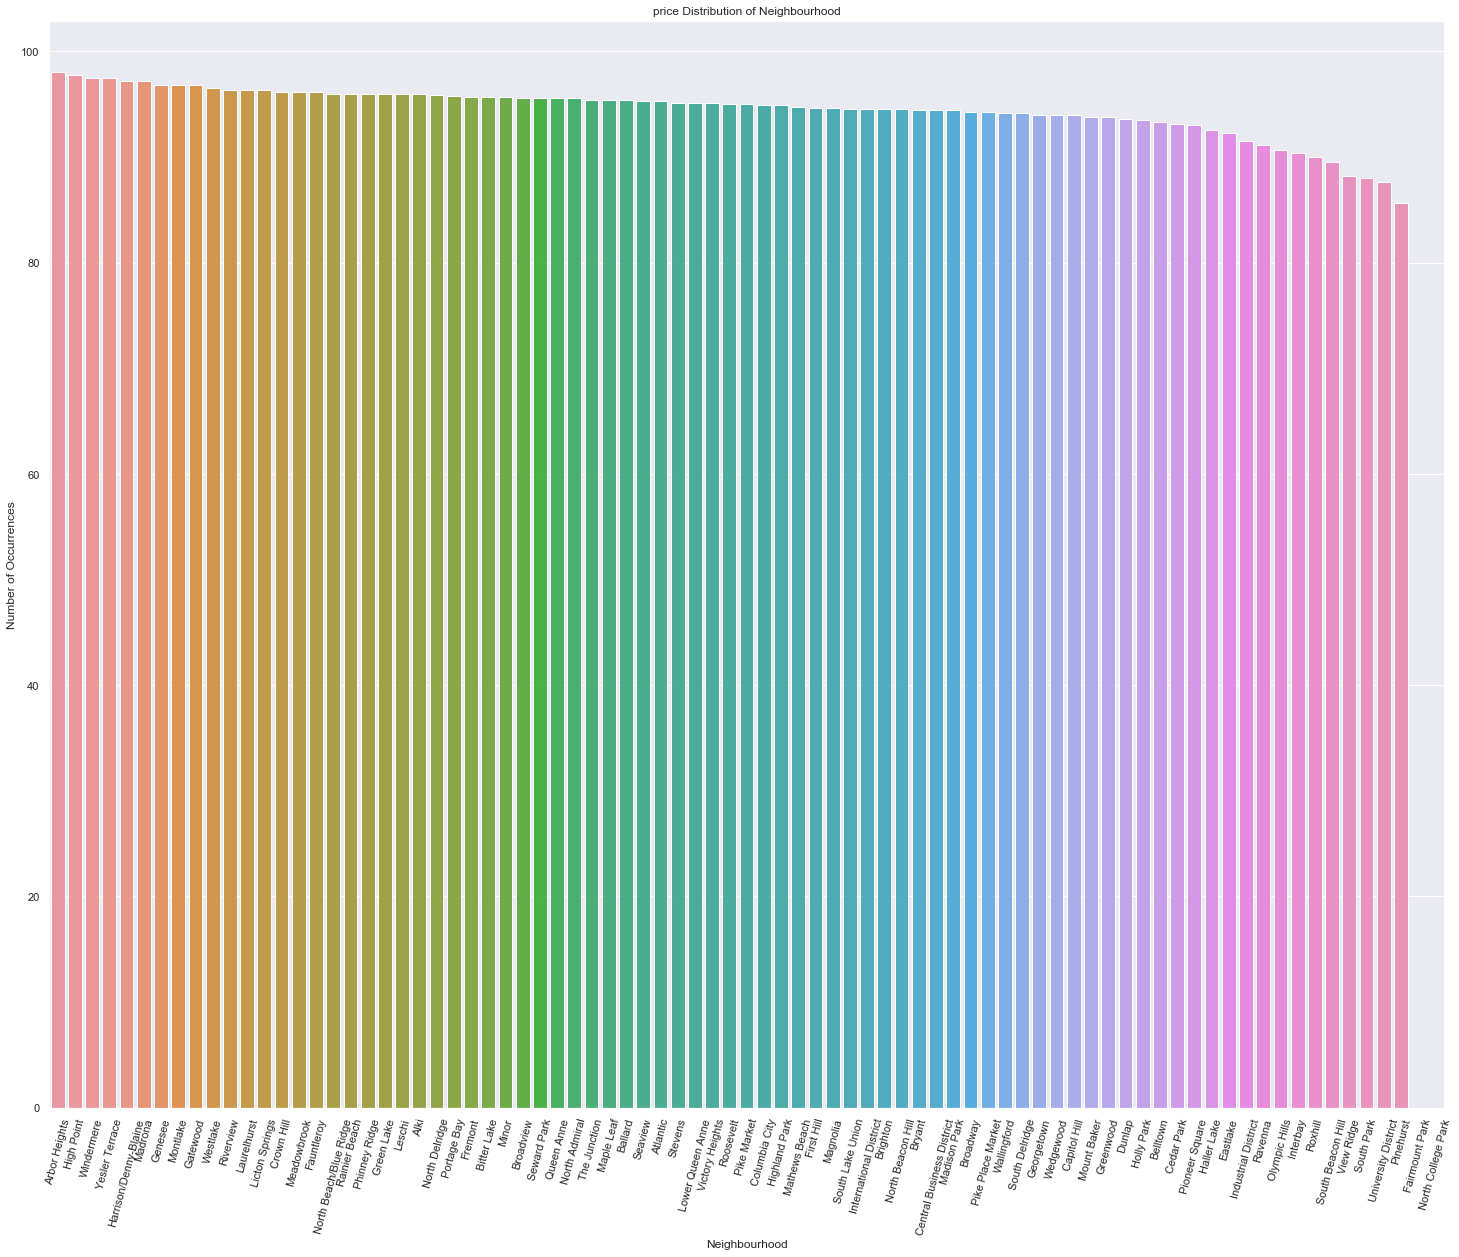

In [31]:
neighbourhood_review = listing_q3_df.groupby('neighbourhood')['review_scores_rating'].mean().sort_values(ascending = False)
sns.set(style="darkgrid")
plt.figure(figsize=(25, 20))
a = sns.barplot(neighbourhood_review.index, neighbourhood_review.values, alpha=0.99)
a.set_xticklabels(a.get_xticklabels(), rotation=75)
plt.title('price Distribution of Neighbourhood')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.show()

as we cna deduce from above graph neighbourhood has no effect on review score

### Summary

    This notebook uses data from the Seattle area of Airbnb and has been analyzed to answer the following questions. Here we summarize the answers to those questions.

#### - What are the busiest times of the year to visit Seattle?

    what we could deduce from the data we have is that is is usualy at it's peak in begining of sptember

#### - Is there a busy season?

    The answer is Yes.
    Apart from the increase in the number of Airbnb users, there was definitely a timely increase in the number of reviews at the same time each year.
    It is thought that it is about one month around early September to November and overlaps with the summer vacation time. It is important that the number of properties that can be provided at this time exceeds demand.

#### - Do some neighborhood have more listings than other? and dose it effect reviews?and what is average price per night?

    What i found that some do have way more than others. as for reviews i  found that neighborhood didnt effect reviews and there is no big differenc between them, as for price for sure there were big difference between neighborhoods.